In [21]:
%pip install -r requirements.txt -q
%pip install --upgrade kaleido

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\projetos\kaua\trabalho_topicos_5\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\projetos\kaua\trabalho_topicos_5\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [22]:
import os
import zipfile
import pandas as pd
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pio.renderers.default = 'png'

In [23]:
path_database = './database'
path_database_zip = f'{path_database}/breast-cancer-dataset.zip'
path_database_csv = f'{path_database}/breast-cancer.csv'
os.makedirs(path_database, exist_ok=True)

In [24]:
if not os.path.exists(path_database_zip):
    !curl -L -o {path_database_zip} https://www.kaggle.com/api/v1/datasets/download/yasserh/breast-cancer-dataset
zipfile.ZipFile(path_database_zip, 'r').extractall(path_database)

In [25]:
df_dataset = pd.read_csv(path_database_csv)
df_dataset['diagnosis'] = df_dataset['diagnosis'].map({'M': 'Maligno', 'B': 'Benigno'})
df_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,Maligno,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,Maligno,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,Maligno,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,Maligno,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,Maligno,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


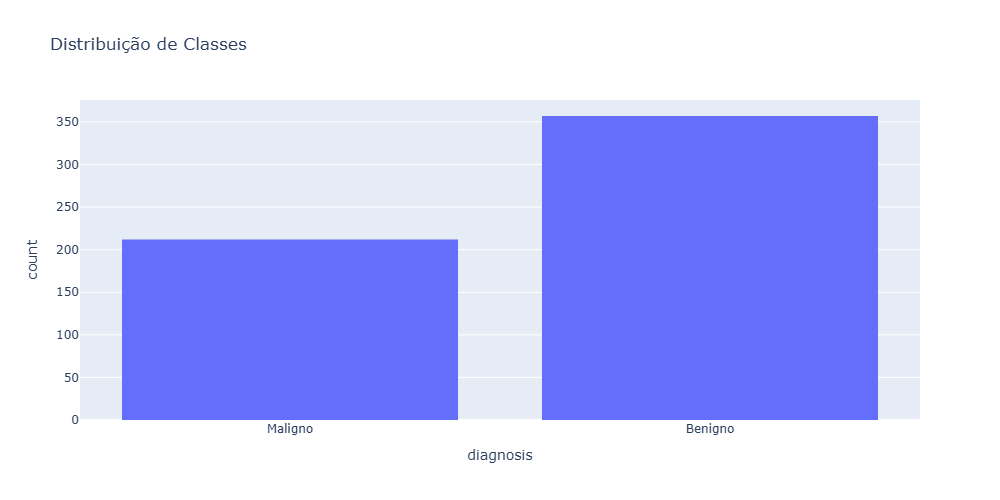

In [33]:
px.histogram(df_dataset, x='diagnosis', title='Distribuição de Classes', width=1000)

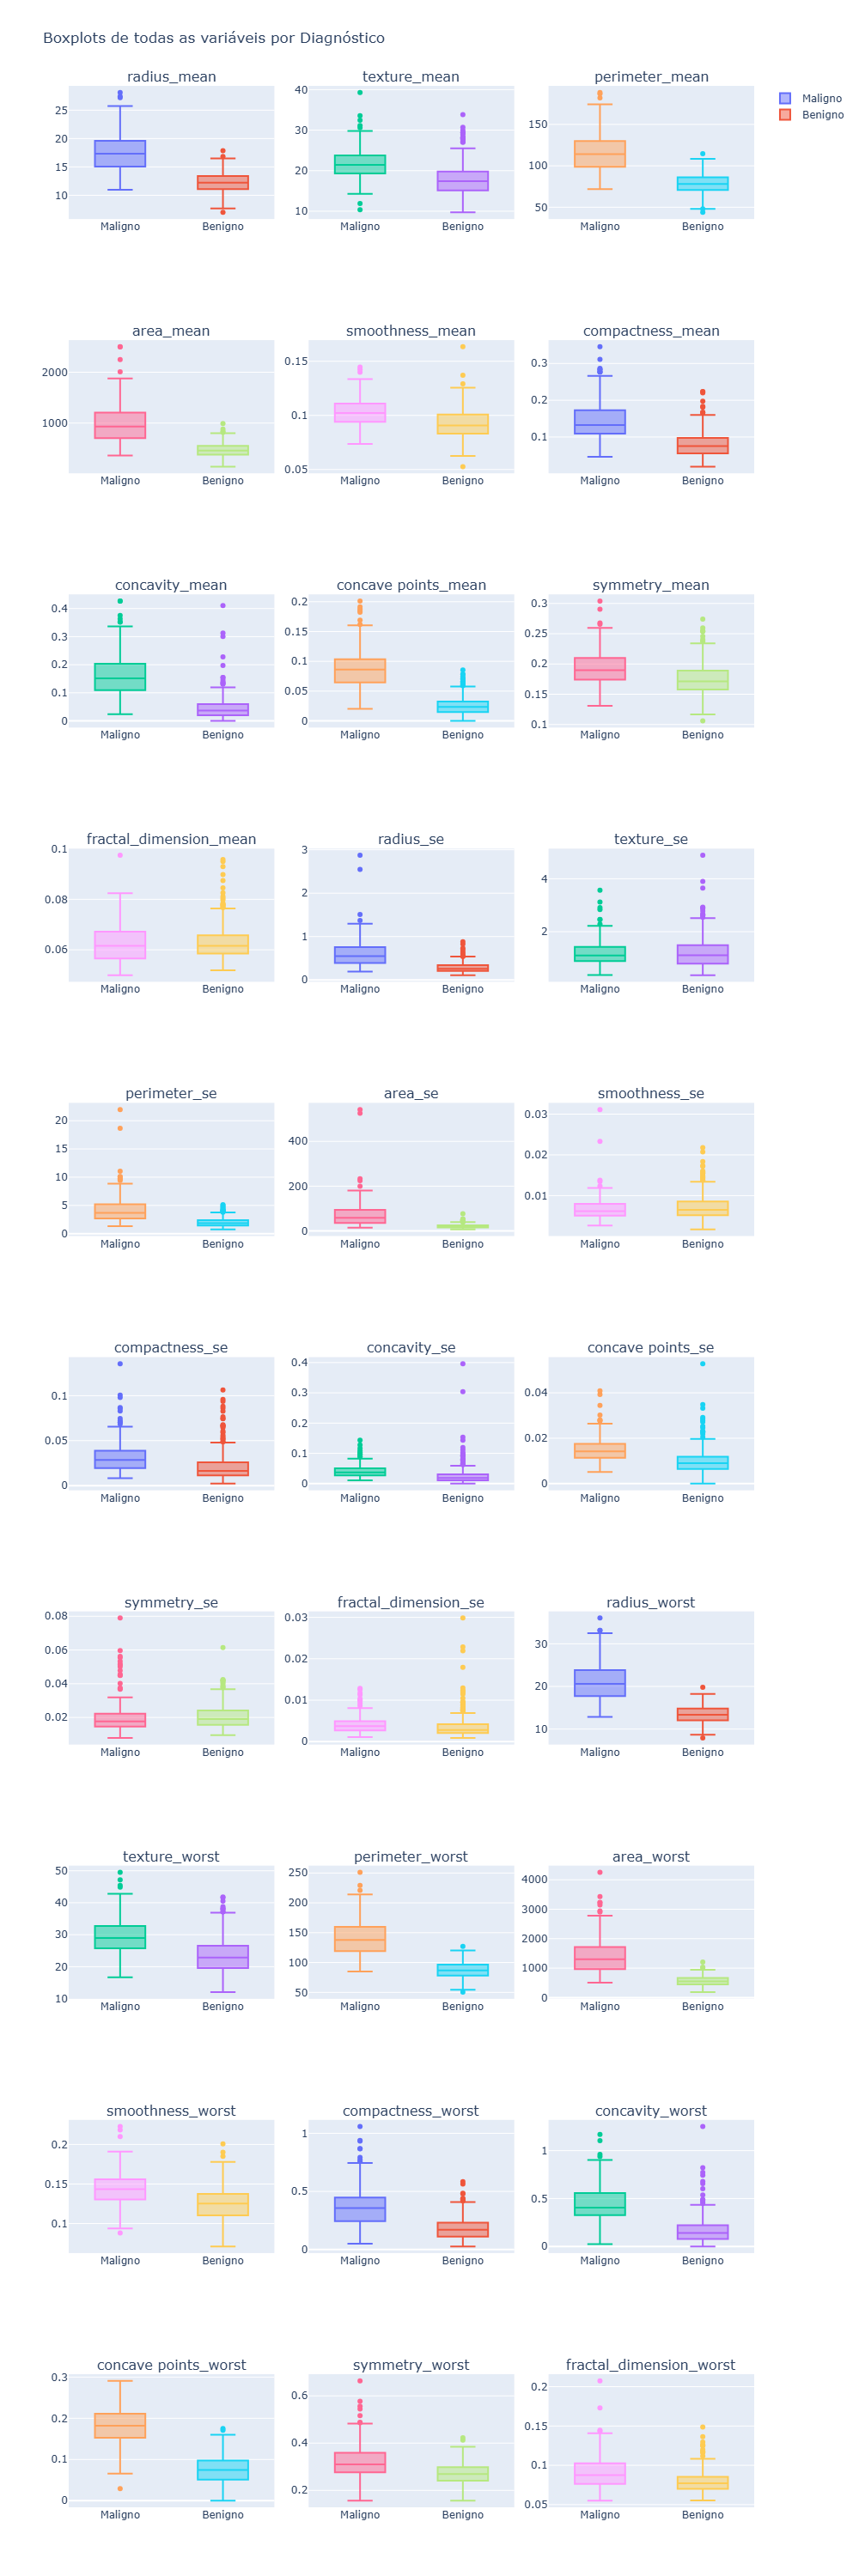

In [27]:


colunas_numericas = [col for col in df_dataset.select_dtypes(include=['float64', 'int64']).columns if col != 'id']

n_cols = 3
n_rows = (len(colunas_numericas) + n_cols - 1) // n_cols

fig = make_subplots(
    rows=n_rows, 
    cols=n_cols,
    subplot_titles=colunas_numericas,
    vertical_spacing=0.05,   
    horizontal_spacing=0.05  
)

for idx, coluna in enumerate(colunas_numericas):
    row = idx // n_cols + 1
    col = idx % n_cols + 1
    
    for diagnosis in df_dataset['diagnosis'].unique():
        df_filtrado = df_dataset[df_dataset['diagnosis'] == diagnosis]
        fig.add_trace(
            go.Box(y=df_filtrado[coluna], name=diagnosis, showlegend=(idx == 0)),
            row=row,
            col=col
        )

fig.update_layout(
    height=300 * n_rows,  # Reduzido para compactar mais
    width=1000,
    title_text="Boxplots de todas as variáveis por Diagnóstico",
    showlegend=True
)
fig.show()

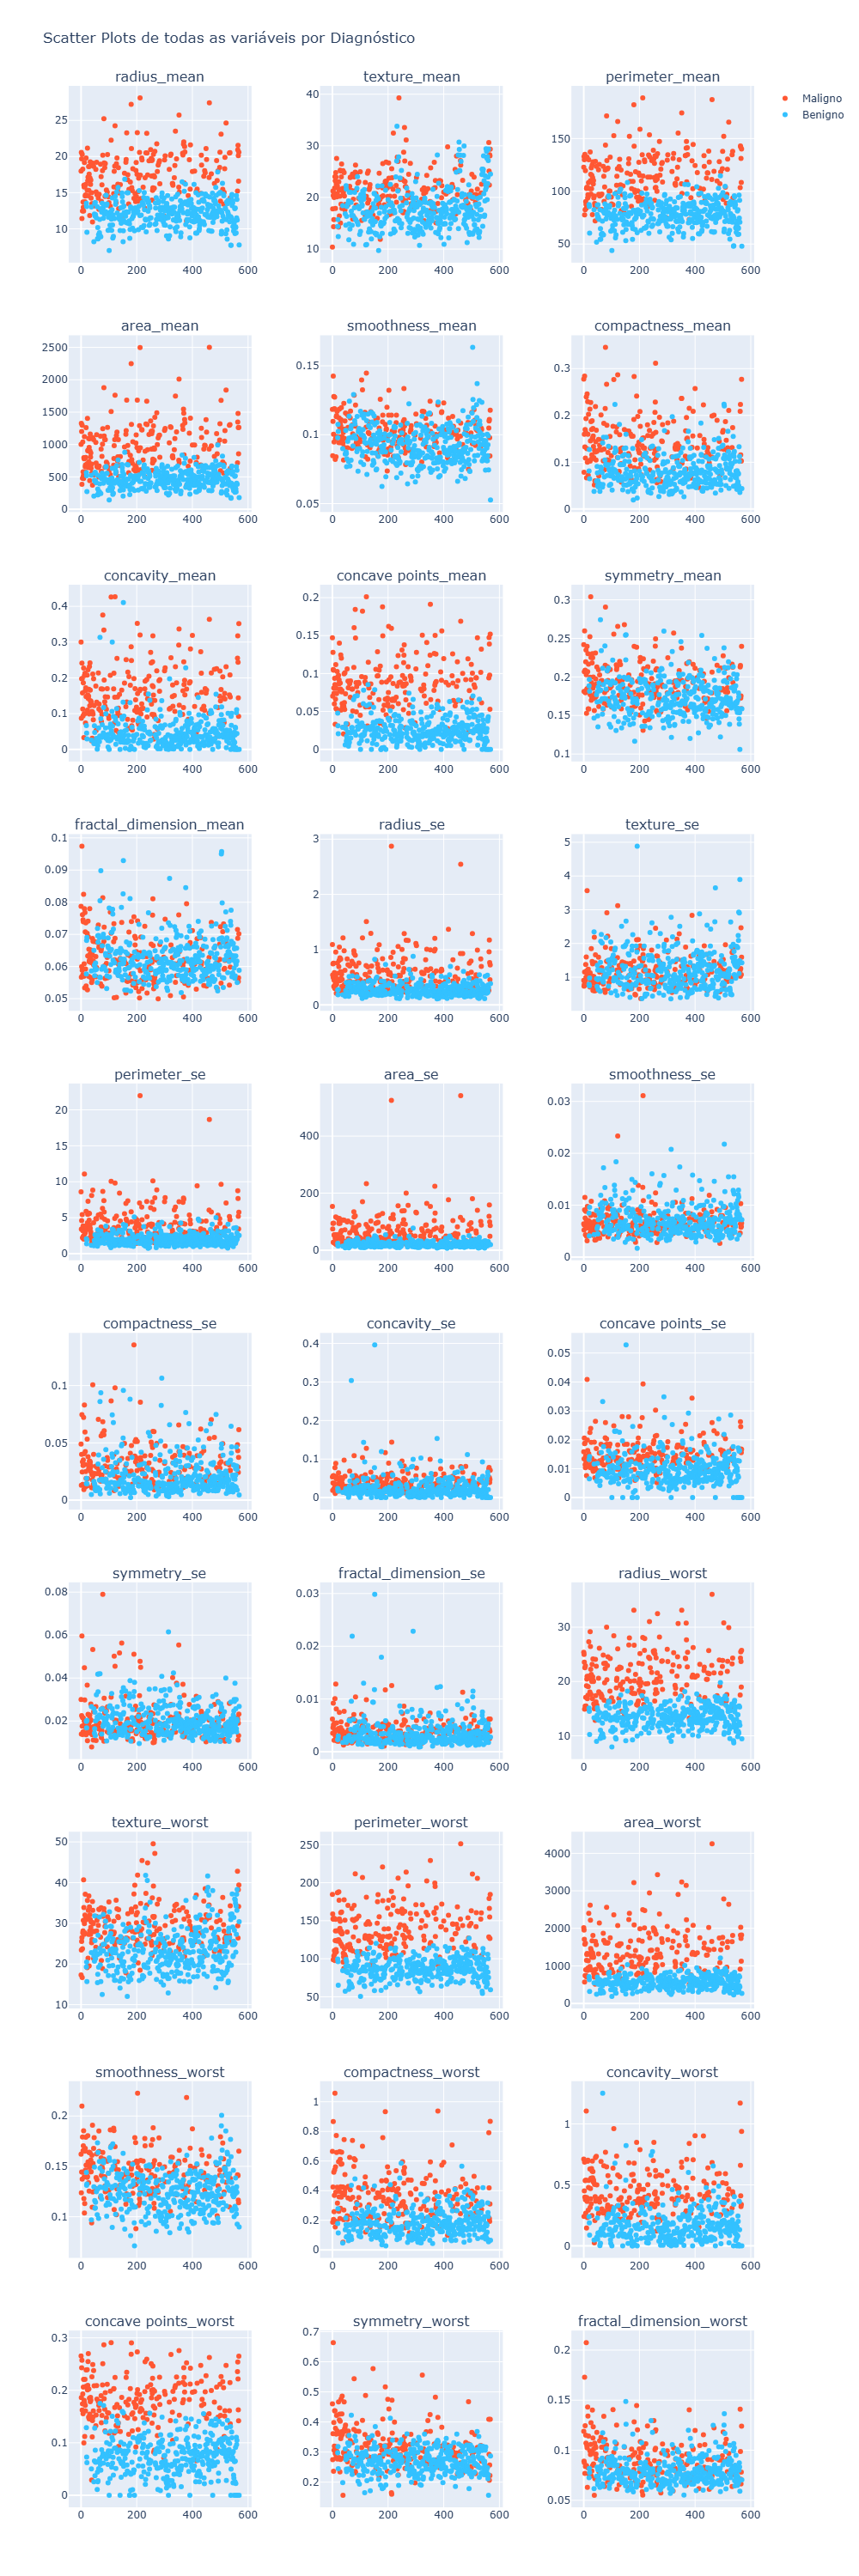

In [28]:
# Scatter plots em subplots para todas as variáveis
colunas_numericas = [col for col in df_dataset.select_dtypes(include=['float64', 'int64']).columns if col != 'id']
colunas_scatter = colunas_numericas

n_cols = 3
n_rows = (len(colunas_scatter) + n_cols - 1) // n_cols

fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    subplot_titles=colunas_scatter,
    vertical_spacing=0.03,    # Reduzido para caber em 15 linhas (< 0.071429)
    horizontal_spacing=0.1
)

for idx, coluna in enumerate(colunas_scatter):
    row = idx // n_cols + 1
    col = idx % n_cols + 1
    
    for diagnosis in df_dataset['diagnosis'].unique():
        df_filtrado = df_dataset[df_dataset['diagnosis'] == diagnosis]
        color = '#FF5733' if diagnosis == 'Maligno' else '#33C1FF'
        
        fig.add_trace(
            go.Scatter(
                x=df_filtrado.index,
                y=df_filtrado[coluna],
                mode='markers',
                name=diagnosis,
                marker=dict(color=color),
                showlegend=(idx == 0)
            ),
            row=row,
            col=col
        )

fig.update_layout(
    height=300 * n_rows, 
    width=1000,
    title_text="Scatter Plots de todas as variáveis por Diagnóstico",
    showlegend=True
)
fig.show()

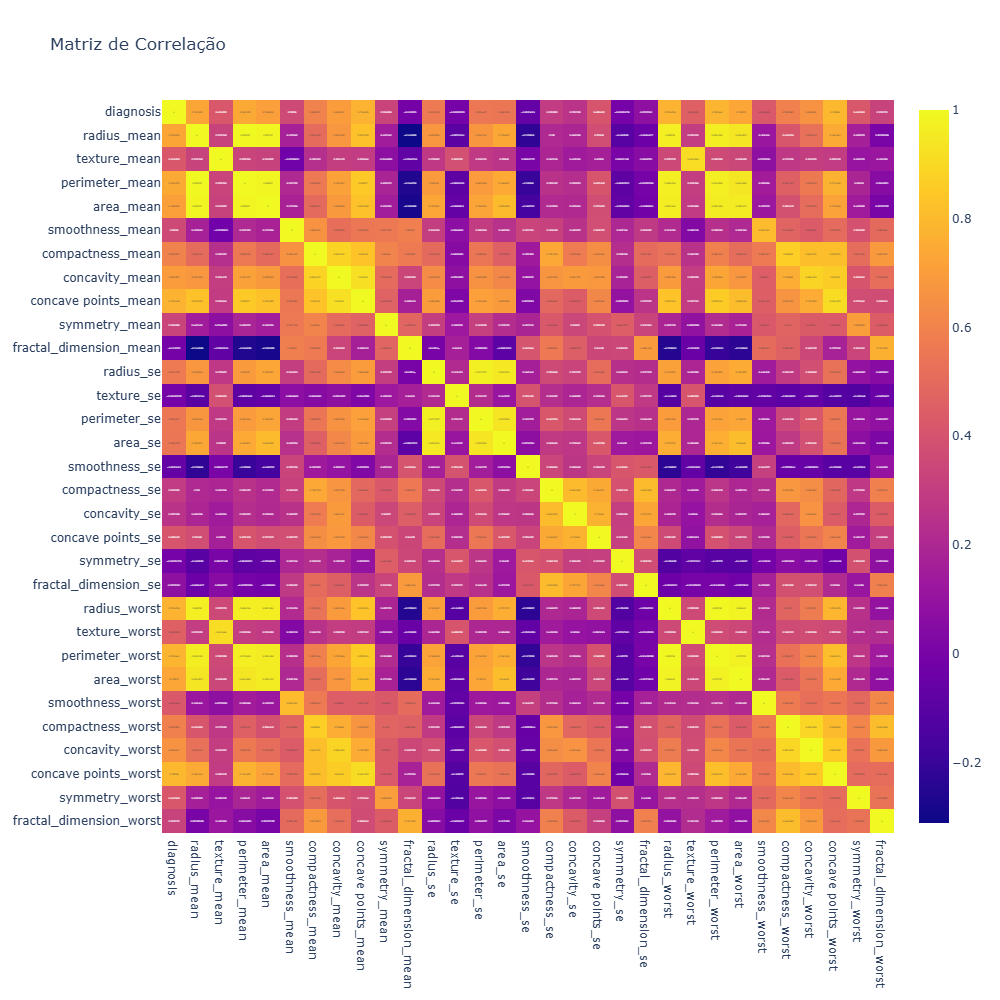

In [29]:
# Criar cópia e converter diagnosis para numérico
df_numeric = df_dataset.copy()
df_numeric['diagnosis'] = df_numeric['diagnosis'].map({'Maligno': 1, 'Benigno': 0}).astype(int)

# Remover coluna 'id' se existir
if 'id' in df_numeric.columns:
    df_numeric = df_numeric.drop('id', axis=1)

fig = px.imshow(
    df_numeric.corr(), 
    text_auto=True, 
    aspect="auto", 
    title='Matriz de Correlação',
    height=1000,
    width=1000,
)


fig.show()

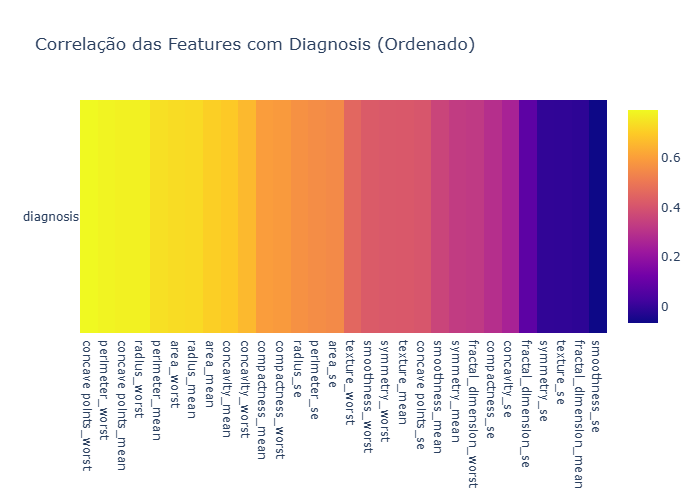

In [30]:
corr_diagnosis = df_numeric.corr()['diagnosis'].drop('diagnosis').sort_values(ascending=False)
corr_df = pd.DataFrame({
    'Feature': corr_diagnosis.index,
    'Correlação': corr_diagnosis.values
})

fig = px.imshow(
    corr_diagnosis.values.reshape(1, -1),
    x=corr_diagnosis.index,
    y=['diagnosis'],
    aspect="auto",
    title='Correlação das Features com Diagnosis (Ordenado)',
)

fig.show()

In [31]:
dados_normalizados = (df_numeric - df_numeric.min()) / (df_numeric.max() - df_numeric.min())
dados_sem_normalizacao = df_numeric.copy()

In [32]:
dados_normalizados_treino = dados_normalizados.sample(frac=0.8, random_state=42)
dados_normalizados_teste = dados_normalizados.drop(dados_normalizados_treino.index)

dados_sem_normalizacao_treino = dados_sem_normalizacao.sample(frac=0.8, random_state=42)
dados_sem_normalizacao_teste = dados_sem_normalizacao.drop(dados_sem_normalizacao_treino.index)